In [66]:
import networkx as nx
import pandas as pd

H1 = nx.read_edgelist('co_donor_relabeled_nodes.txt',nodetype=str,delimiter='\t!\t')#data=(('number_of_codonors',int)))

print(nx.number_of_nodes(H1) )#should be 212
print( nx.number_of_edges(H1) )#should be 22366
print(nx.density(H1) )


212
22366
1.0


In [67]:
#get a list of the number of codonors
num_codonors_list = []
for e in H1.edges(data=True):
    #e is a tuple
    temp = (e[2])['number_of_codonors']
    num_codonors_list.append(temp)
#print(num_codonors_list)

#get a list of the edges and sort by num codonors
list_of_edges = []
for e in H1.edges(data=True):
    list_of_edges.append(e)
list_of_edges = sorted(H1.edges(data=True), key=lambda tup: tup[2]['number_of_codonors'])#sort by number of codonors
#print(list_of_edges)
print(num_codonors_list)


[27, 14, 3, 5, 4, 68, 2, 0, 1, 2, 1, 6, 7, 27, 3, 24, 14, 0, 13, 12, 6, 0, 6, 40, 9, 9, 42, 26, 15, 9, 17, 14, 23, 12, 5, 19, 2, 6, 0, 7, 6, 5, 13, 4, 1, 8, 6, 1, 16, 1, 11, 2, 2, 8, 2, 3, 1, 9, 7, 7, 4, 2, 8, 34, 6, 4, 40, 9, 3, 16, 44, 49, 50, 29, 29, 19, 44, 0, 29, 6, 6, 3, 3, 8, 17, 6, 3, 5, 3, 8, 3, 2, 24, 2, 6, 4, 3, 5, 12, 6, 4, 10, 3, 1, 2, 2, 4, 0, 15, 5, 5, 0, 0, 5, 19, 16, 0, 2, 31, 5, 20, 1, 1, 1, 18, 7, 91, 7, 32, 3, 15, 6, 4, 47, 3, 4, 11, 2, 2, 1, 14, 30, 12, 0, 11, 12, 5, 2, 1, 8, 7, 18, 5, 17, 3, 11, 20, 0, 7, 4, 16, 5, 1, 9, 3, 15, 32, 4, 15, 2, 7, 12, 4, 7, 1, 14, 9, 4, 22, 4, 4, 14, 11, 5, 4, 3, 7, 2, 1, 6, 2, 2, 1, 8, 1, 0, 3, 0, 2, 1, 10, 5, 2, 29, 8, 6, 0, 0, 9, 9, 16, 156, 28, 16, 46, 417, 28, 23, 33, 220, 75, 95, 60, 1459, 33, 19, 184, 9, 91, 494, 394, 17, 36, 2060, 44, 225, 6162, 1359, 862, 13, 330, 1616, 16, 20, 170, 275, 185, 789, 14, 655, 185, 5, 116, 338, 33, 27, 27, 38, 55, 16, 1879, 47, 10, 12, 104, 14, 6, 77, 83, 39, 10, 4, 102, 1485, 690, 1259, 5383, 3

[  2.19680000e+04   2.52000000e+02   6.00000000e+01   3.00000000e+01
   2.80000000e+01   1.20000000e+01   7.00000000e+00   2.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]


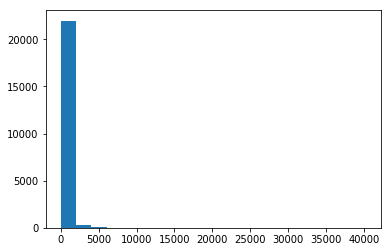

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


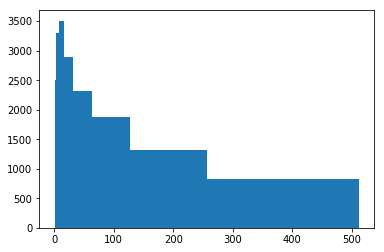

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


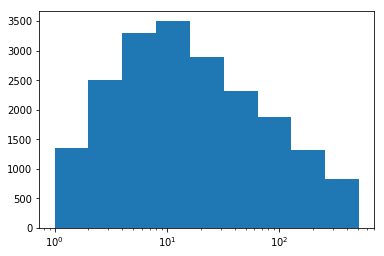

('TAMMY BALDWIN', 'ELIZABETH WARREN', {'number_of_codonors': 40203})


In [68]:
#want to plot distribution of num_codonors, each element of which is a value in the affinity matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

h = sorted(num_codonors_list)
#Bunch of 0's for initial ones. The last sorted values are:
#..., 12946, 13815, 14003, 14022, 14520, 15825, 17183, 18845, 21054, 21388, 22655, 29957, 40203]

#https://stackoverflow.com/questions/34291260/how-can-i-plot-multiple-figure-in-the-same-line-with-matplotlib
#https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell
#https://matplotlib.org/gallery/subplots_axes_and_figures/multiple_figs_demo.html

data = sorted(num_codonors_list)
counts, bins, bars = plt.hist(data, bins=20)
print(counts)
plt.show()

bins = 2**(np.arange(0,10))
#plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

bins = 2**(np.arange(0,10))
plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

print(list_of_edges[-1])

In [69]:
#Power law?
#Popularity is a common power law distribution. Since if you're more popular, you're more likely
#to get donors, and thus have donors in common with someone else, the edge weights resembling the power law
#distribution as well makes sense.
#There are always extremely popular items, and it's skewed in that direction, but most things aren't that popular.

#Note that this graph itself is a subsection of what the overall distribution would have been, because we've only
#selected more popular nodes as donors (the donor must have >= 1000 recipients).
#With those edges restored, the distribution would likely be clearer, but the graph would be too large then
#(especially since it's a complete graph).
#Similarly for the corecip graph, we selected more popular nodes as recipients (the recip must have >= 50 donors).

alpha=  1.27105422764   sigma=  0.00181243326735


/Users/arjunrao/anaconda/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


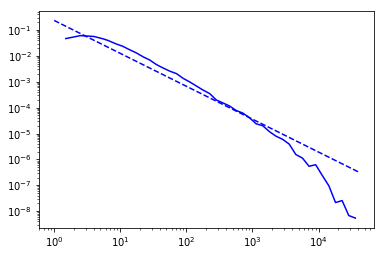

In [70]:

import powerlaw
import numpy as np

%matplotlib inline
fit = powerlaw.Fit(np.array(num_codonors_list)+1,xmin=1,discrete=True)
fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
fit.plot_pdf( color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
